In [38]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [121]:
NUM_CLASSES=7
NUM_FEATURES=2
RANDOM_SEED=42


X,y=make_blobs(n_samples=1000,centers=NUM_CLASSES,n_features=NUM_FEATURES,random_state=RANDOM_SEED,cluster_std=2.15)

In [122]:
import plotly.graph_objects as go

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0],  # X values (first feature)
    y=X[:, 1],  # Y values (second feature)
    z=y,        # Z values (target variable)
    mode='markers',
    marker=dict(
        size=5,
        color=y,                # Color points based on target variable
        colorscale='Viridis'    # Choose a colorscale
    )
)])

# Set layout properties
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Target Variable'
    ),
    title='3D Scatter Plot of X and y'
)

# Show the plot
fig.show()

In [123]:
# Device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [124]:
X_blob=torch.from_numpy(X).type(torch.float)
y_blob=torch.from_numpy(y).type(torch.LongTensor)
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)
X_blob_train,X_blob_test,y_blob_train,y_blob_test=X_blob_train.to(device),X_blob_test.to(device),y_blob_train.to(device),y_blob_test.to(device)

In [125]:
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units):
        super().__init__()
        self.linear_layer_stack=nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features)

        )

    def forward(self,x):
            return self.linear_layer_stack(x)


model_0=BlobModel(input_features=NUM_FEATURES,output_features=NUM_CLASSES,hidden_units=8).to(device)


In [126]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)
epochs=500


In [127]:
model_0.eval()
with torch.inference_mode():
    y_logits=model_0(X_blob_test)
    y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
y_pred

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4])

In [128]:
#  Convert our model's prediction probabilities to labels

In [129]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

#  Create a training loop
for epoch in range(epochs):
    model_0.train()

    y_logits=model_0(X_blob_train)
    y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
    train_loss=loss_fn(y_logits,y_blob_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_acc=accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

    model_0.eval()
    with torch.inference_mode():
        test_logits=model_0(X_blob_test)
        test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss=loss_fn(test_logits,y_blob_test)
        test_acc=accuracy_fn(y_true=y_blob_test,y_pred=test_pred)

    if epoch%10==0:
        print(f"Epoch : {epoch} | train_loss : {train_loss:.4f} | train_acc : {train_acc:.4f}: | test_loss : {test_loss:.4f} | test_acc : {test_acc:.4f}")


Epoch : 0 | train_loss : 2.0474 | train_acc : 13.8750: | test_loss : 1.9973 | test_acc : 16.0000
Epoch : 10 | train_loss : 1.8494 | train_acc : 23.8750: | test_loss : 1.8479 | test_acc : 25.0000
Epoch : 20 | train_loss : 1.6156 | train_acc : 41.7500: | test_loss : 1.6403 | test_acc : 34.0000
Epoch : 30 | train_loss : 1.3483 | train_acc : 37.5000: | test_loss : 1.4275 | test_acc : 33.0000
Epoch : 40 | train_loss : 1.1841 | train_acc : 48.1250: | test_loss : 1.2664 | test_acc : 40.5000
Epoch : 50 | train_loss : 1.0403 | train_acc : 63.7500: | test_loss : 1.1079 | test_acc : 62.5000
Epoch : 60 | train_loss : 0.8996 | train_acc : 69.5000: | test_loss : 0.9629 | test_acc : 69.0000
Epoch : 70 | train_loss : 0.8192 | train_acc : 70.1250: | test_loss : 0.8789 | test_acc : 68.0000
Epoch : 80 | train_loss : 0.7668 | train_acc : 70.5000: | test_loss : 0.8370 | test_acc : 66.5000
Epoch : 90 | train_loss : 0.7042 | train_acc : 72.0000: | test_loss : 0.7683 | test_acc : 68.0000
Epoch : 100 | train_l

In [130]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

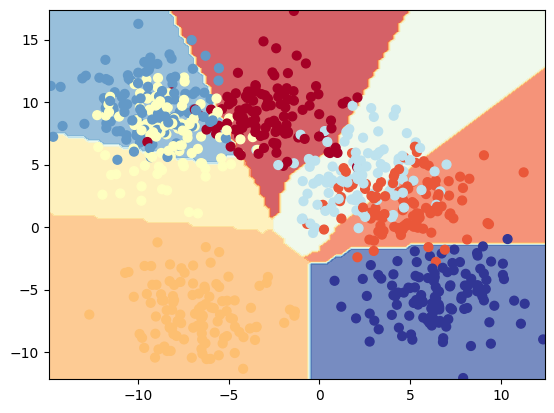

In [131]:
import numpy as np
plot_decision_boundary(model=model_0,X=X_blob_train,y=y_blob_train)

In [135]:
import numpy as np
import torch
import plotly.graph_objects as go

def plot_decision_boundary_3d(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of a model predicting on X in comparison to y using Plotly in 3D."""
    # Move model and data to CPU
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features for prediction
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Get predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Check for multi-class or binary classification
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # multi-class
    else:
        y_pred = torch.sigmoid(y_logits).squeeze()  # binary

    # Reshape predictions for the grid
    z = y_pred.reshape(xx.shape).detach().numpy()

    # Create 3D plot
    fig = go.Figure()

    # Add surface for decision boundary
    fig.add_trace(go.Surface(z=z, x=xx, y=yy, colorscale='RdYlBu', opacity=0.7))

    # Add scatter plot for data points
    fig.add_trace(go.Scatter3d(
        x=X[:, 0].numpy(),
        y=X[:, 1].numpy(),
        z=y.numpy(),
        mode='markers',
        marker=dict(size=5, color=y.numpy(), colorscale='RdYlBu', symbol='circle')
    ))

    # Update layout
    fig.update_layout(
        scene=dict(
            xaxis_title='X1',
            yaxis_title='X2',
            zaxis_title='Prediction'
        ),
        title="3D Decision Boundary"
    )

    # Show plot
    fig.show()

plot_decision_boundary_3d(model=model_0,X=X_blob_train,y=y_blob_train)